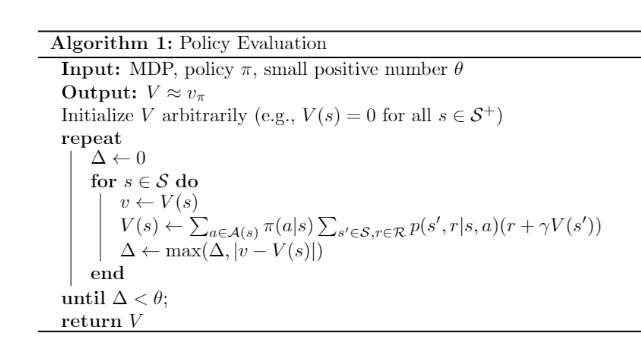

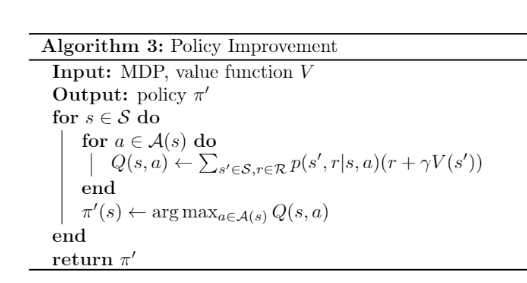

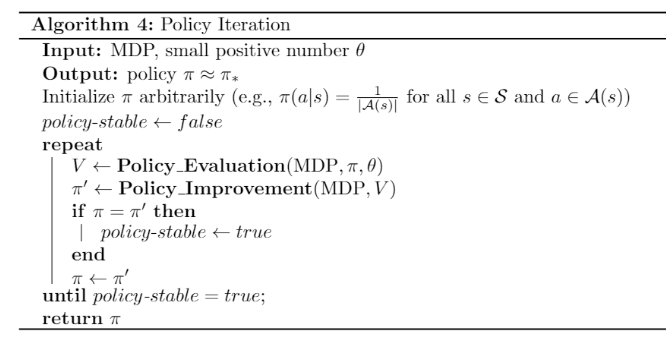

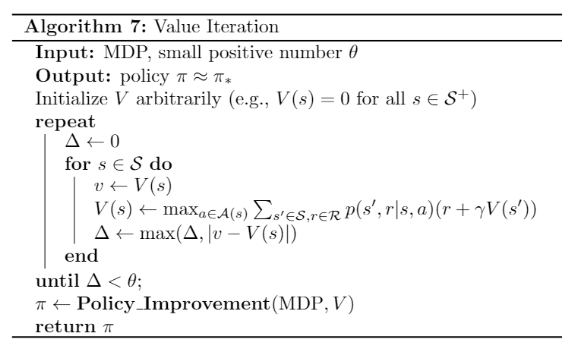

In [1]:
import gym
import numpy as np

In [2]:
def policy_evaluation(P, nS, nA, pi, gamma=0.9, tol=1e-3):
    v = np.zeros(nS)
    new_v = v.copy()

    while True:
        for s in range(nS):
            for prob, next_s, reward, terminal in P[s][pi[s]]:
                new_v[s] += prob * (reward + gamma * v[next_s])
                # new_v[s] += reward + gamma * prob * v[next_s]
        
        if np.sum(np.abs(new_v - v)) < tol:
            break

        v = new_v.copy()
        new_v = np.zeros(nS)

    return v

In [3]:
def policy_improvement(P, nS, nA, v, gamma=0.9):
    pi = np.zeros(nS, dtype=int)
    
    for s in range(nS):
        B = np.zeros(nA)
        q = -99
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                B[a] += prob * (reward + gamma * v[next_s])
                # B[a] += reward + gamma * prob * v[next_s]
            
            if B[a] > q:
                q = B[a]
                pi[s] = a
            elif B[a] == q:
                if np.random.uniform() < 0.5:
                    pi[s] = a

    return pi

In [4]:
def policy_iteration(P, nS, nA, gamma=0.9, tol=1e-3):
    v = np.zeros(nS)
    pi = np.zeros(nS, dtype=int)
    for s in range(nS):
        pi[s] = s % nA

    while True:
        new_v = policy_evaluation(P, nS, nA, pi, gamma, tol)
        new_pi = policy_improvement(P, nS, nA, new_v, gamma)
        
        if np.sum(np.abs(new_v - v)) < tol:
            break 

        v = new_v.copy()
        pi = new_pi.copy()

    return pi

In [5]:
def value_iteration(P, nS, nA, gamma=0.9, tol=1e-3, max_iter=20):
    v = np.zeros(nS)
    
    while True:
        new_v = np.zeros(nS)

        for s in range(nS):
            for a in range(nA):
                q = 0
                for prob, next_s, reward, terminal in P[s][a]:
                    q += prob * (reward + gamma * v[next_s])
                    # q += reward + gamma * prob * v[next_s]
                
                if new_v[s] < q:
                    new_v[s] = q

        if np.sum(np.abs(new_v - v)) < tol:
            break

        v = new_v.copy()

    new_pi = policy_improvement(P, nS, nA, v)
    return new_pi

In [6]:
env = gym.make("FrozenLake-v0")
env.nS, env.nA

(16, 4)

In [7]:
env.render()


SFFF
FHFH
FFFH
HFFG


In [8]:
p_pi = policy_iteration(env.P, env.nS, env.nA)
v_pi = value_iteration(env.P, env.nS, env.nA)

In [9]:
p_pi.shape, v_pi.shape

((16,), (16,))

In [10]:
def play(env, episodes, max_steps, pi):
    rewards = 0
    for episode in range(episodes):
        s = env.reset()

        for step in range(max_steps):
            a = pi[s]
            s, r, done, _ = env.step(a)
            rewards += r
            if done:
                break

    print(f"Score: {rewards}/{episodes}")        

In [11]:
episodes = 50
max_steps = 100

In [12]:
print("Policy Iteration:")
play(env, episodes, max_steps, p_pi)

print("")

print("Value Iteration:")
play(env, episodes, max_steps, v_pi)

Policy Iteration:
Score: 36.0/50

Value Iteration:
Score: 39.0/50
